In [29]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

from tesspy import Tessellation
from shapely.wkt import loads
from shapely.geometry import Point, Polygon

In [30]:
import warnings
warnings.simplefilter("ignore")

In [31]:
Fortaleza = Tessellation("Fortaleza")
Fortaleza_polygon = Fortaleza.get_polygon()

Text(0.5, 1.0, 'Fortaleza')

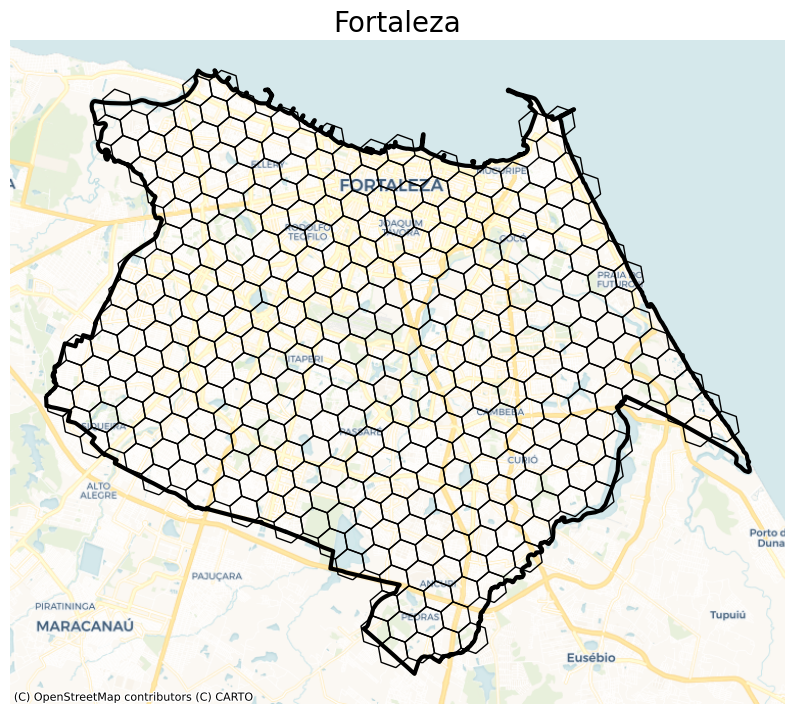

In [32]:
Fortaleza_hexagons = Fortaleza.hexagons(8)

fig, ax = plt.subplots(figsize=(10,15))

Fortaleza_hexagons.to_crs("EPSG:3857").plot(ax=ax, facecolor="none", edgecolor="k", lw=1)
#contorno
Fortaleza_polygon.to_crs("EPSG:3857").plot(ax=ax, facecolor="none", edgecolor="k", lw=3)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title("Fortaleza", fontsize=20)

In [56]:
Fortaleza_hexagons.to_gop('D:\AEY HELTH\harquivos_streamlit\Fortaleza_hexagons.csv', sep = ';', index_label=False)

AttributeError: 'GeoDataFrame' object has no attribute 'to_gop'

In [57]:
Fortaleza_hexagons.to_file(r'D:\AEY HELTH\harquivos_streamlit\Fortaleza_hexagons.shp')

In [34]:
lista = []
for i in range(len(Fortaleza_hexagons)):
    valor = 'Zona_'+str(i+1)
    lista.append(valor)


In [35]:
print(Fortaleza_hexagons['geometry'][0])

POLYGON ((-38.52510905277765 -3.813308480101637, -38.521088065556434 -3.8099309466858866, -38.522006581240724 -3.804759191585836, -38.52694603948309 -3.802964909113375, -38.53096706529207 -3.806342396089447, -38.53004859428268 -3.811514211968449, -38.52510905277765 -3.813308480101637))


In [36]:
Fortaleza_hexagons['Zonas'] = lista

In [37]:
df_lat_lon = pd.read_csv('D:\AEY HELTH\df_lat_lon.csv', sep = ';')

In [38]:
df_lat_lon

,CNPJ BÁSICO,NOME FANTASIA,CNAE FISCAL PRINCIPAL,EMDERECO COMPLETO,ID,LAT,LON
0,50974655,CAROLINA DIAS,6209100,"AVELEDO ,501 - MESSEJANA ,FORTALEZA - CE",8893,-3.836597,-38.496706
1,37465737,APF ENGENHARIA,7112000,"DOUTOR JOAQUIM FROTA ,1000 - JOSE DE ALENCAR ,...",7142,-3.801340,-38.469862
2,26852804,MIX FRANGO,4729699,"CORONEL VIRGILIO NOGUEIRA ,1018 - GRANJA LISBO...",10877,-3.789604,-38.609068
3,29338960,MANEQUINS & CABIDES,4789099,"JOSE AVELINO ,237 - CENTRO ,FORTALEZA - CE",11729,-3.722322,-38.520499
4,31787027,VINTAGE,9430800,"VISCONDE DO RIO BRANCO ,1605 - CENTRO ,FORTALE...",8539,-3.734807,-38.524229
...,...,...,...,...,...,...,...
14491,51287112,ALISSON CELL,4752100,"24 DE MAIO ,411 - CENTRO ,FORTALEZA - CE",13577,-3.725351,-38.531078
14492,17533024,BIBIQUINES,4781400,"13 DE MAIO ,369 - FATIMA ,FORTALEZA - CE",1344,-3.753314,-38.525016
14493,41862377,REI DAS CASES IMPORTS,4752100,"24 DE MAIO ,411 - CENTRO ,FORTALEZA - CE",13625,-3.725351,-38.531078
14494,42867134,TT MULTIMARCAS,4511102,"13 DE MAIO ,149 - FATIMA ,FORTALEZA - CE",11938,-3.753901,-38.521927


In [39]:
array_strings = np.full(len(df_lat_lon), np.nan, dtype='object')

In [40]:
len(df_lat_lon)

14496

In [41]:
type(Fortaleza_hexagons['geometry'][0])

shapely.geometry.polygon.Polygon

In [42]:
array_strings = ['NaN'] * len(df_lat_lon)

for i, hexagono in enumerate(Fortaleza_hexagons['geometry']):
    pontos_contidos = df_lat_lon[df_lat_lon.apply(lambda row: hexagono.contains(Point(row['LON'], row['LAT'])), axis=1)]
    if not pontos_contidos.empty:
        indices_contidos = pontos_contidos.index
        for idx in indices_contidos:
            array_strings[idx] = Fortaleza_hexagons.loc[i, 'Zonas']

In [43]:
df_lat_lon['Zonas'] = array_strings

In [44]:
df_lat_lon.dropna(subset=['Zonas'], inplace=True)

In [45]:
df_lat_lon.to_csv('D:\AEY HELTH\harquivos_streamlit\df_lat_lon.csv', sep = ';', index=False)

In [46]:
lista_zonas = sorted(list(df_lat_lon['Zonas'].drop_duplicates()))

In [47]:
# lista_zonas

In [48]:
len(lista_zonas)

325

In [49]:
lista_canaes = list(df_lat_lon['CNAE FISCAL PRINCIPAL'].drop_duplicates())

In [50]:
dicionario = {}

In [51]:
for zona in lista:
    if zona != 'NaN':
        df_aux1 = df_lat_lon[df_lat_lon['Zonas'] == zona]
        dicionario[zona] = {}
        for canal in lista_canaes:
            df_aux2 = df_aux1[df_aux1['CNAE FISCAL PRINCIPAL'] == canal]
            dicionario[zona][canal] = len(df_aux2)

In [52]:
df = pd.DataFrame.from_dict(dicionario, orient='index')

In [53]:
df

,6209100,7112000,4729699,4789099,9430800,7319002,5611201,4781400,8211300,7490104,...,8550301,8513900,9491000,7319003,8291100,9511800,6204000,8650003,8650004,4754701
Zona_1,0,2,0,0,0,1,5,1,3,0,...,0,0,0,0,0,1,1,0,0,1
Zona_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zona_3,1,0,1,0,1,0,1,0,1,0,...,1,0,2,0,0,0,0,1,0,1
Zona_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zona_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zona_352,0,0,2,0,0,0,1,2,0,0,...,1,0,1,1,0,0,0,0,0,1
Zona_353,1,2,0,1,2,4,4,6,9,0,...,0,0,1,0,1,0,0,3,0,1
Zona_354,0,1,0,2,1,1,2,1,1,1,...,1,0,0,0,0,0,0,1,0,2
Zona_355,0,0,0,1,0,1,1,8,4,0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
df.to_csv('D:\AEY HELTH\df_zona_cnae.csv', index_label=False, sep = ';')

In [ ]:
df

,6209100,7112000,4729699,4789099,9430800,7319002,5611201,4781400,8211300,7490104,...,8550301,8513900,9491000,7319003,8291100,9511800,6204000,8650003,8650004,4754701
Zona_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Zona_2,1,2,0,1,2,4,4,6,9,0,...,0,0,1,0,1,0,0,3,0,1
Zona_3,0,2,0,0,0,1,3,1,1,0,...,2,1,1,0,0,0,0,0,0,1
Zona_4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zona_5,1,0,0,1,3,0,1,2,1,0,...,2,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zona_352,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zona_353,1,0,0,2,0,0,1,1,8,2,...,0,0,1,0,0,0,1,2,1,0
Zona_354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zona_355,0,1,0,0,0,0,3,0,0,0,...,0,1,1,0,1,0,0,0,0,0


In [58]:
Fortaleza_polygon

,osm_id,geometry
0,302588,"POLYGON ((-38.63791 -3.80142, -38.63790 -3.801..."


: 

In [ ]:
# df = pd.read_csv('D:\AEY HELTH\df_lat_lon.csv', sep = ';', usecols=['CNPJ BÁSICO',
#        'NOME FANTASIA', 'CNAE FISCAL PRINCIPAL', 'EMDERECO COMPLETO', 'ID',
#        'LAT', 'LON'])

In [ ]:
# df.to_csv('D:\AEY HELTH\df_lat_lon.csv', sep = ';', index=False)

# strim lit